In [113]:
import glob
import json
from typing import List

import pandas as pd
import seaborn as sns

In [114]:
ANNO_DATA_DIR: str = './annotated'
DATA_OUT_PATH: str = './dataset'
OUT_PATH: str = './figures'
RAW_DATA_DIR: str = './finished/main-gpt4' 

In [119]:
raw_samples = []
for filename in glob.glob(ANNO_DATA_DIR + '/*.json'):
    with open(filename, 'r') as f:
        file_data = json.load(f)
        for sample in file_data:
            raw_samples.append(sample)
len(raw_samples)

1038

In [120]:
dataset: pd.DataFrame = (
    pd.json_normalize(raw_samples)
    .set_index('id')    
    .replace({
        'mistralai/Mistral-7B-Instruct-v0.2': 'Mistral-7B'
    })
    .replace({
        'gpt-4-turbo-preview': 'GPT-4'
    })

)

In [121]:
backgroundlist: List[str] = ["affluent-young-woman", "carpenter","environmental-activist","ex-convict", "hustler", "male-college-student", "office-worker", "pensioner", "phd-student", "privileged-woman", "retired-professor", "single-parent", "struggling-artist", "teenager", "unemployed", "wealthy-entrepreneur"]
personaslist: List[str] = ["neutral", "troll", "dystopian", "devilsadvocate", "know-it-all", "mediator", "educator", "karen", "misogynist", "misogynist-dense", "esoteric", "hippie-dense", "hippie", "supportive-saviour-dense", "influencer", "influencer-dense", "social-media-activist-dense", "social-media-activist", "anti", "hobby-expert-dense", "hobby-expert", "narcissist", "sceptic", "shy", "toxic-positive", "traditionalist"]
languagelist: List[str] = ["language-youth", "language-default", "language-old"]
political_viewlist: List[str] = ["conservative", "disengaged", "far-right", "progressive", "radical-left"]
real_tweets: List[str] = [
    ".\u2066@AOC\u2069 is it a \u201ccrime against humanity\u201d when \u2066@POTUS\u2069 secretly flies migrants into Westchester (the place you grew up)? The crime here is allowing the continued flow of illegal immigration, human trafficking and drugs. It has to stop!",
    "Biden\u2019s set on taking away your choice and forcing you to abide by his radical climate agenda. Un-American!",
    "Abortion is health care & should be between a woman & her doctor, not left to politicians like Yvette Herrell who would ban abortion without exceptions for rape, incest or the life of the mother. #NM02",
    "A high school debate team ignores the debate prompt and instead attacks white Christians...and then WINS THE DEBATE: \"We demand that white Christians be held accountable for America's original sin.\" This vile, anti-White racism is rewarded by so-called \"academics.\" We must stop it.",
    "The clean energy revolution is here and we’re going to power it with green union jobs.",
]
def find_language(persona):
    for language in languagelist:
        if language in persona:
            return language
    return None
def find_main_persona(persona):
    for p in personaslist:
        if p in persona:
            return p
    return None
def find_background(persona):
    for background in backgroundlist:
        if background in persona:
            return background
    return None
def find_political_view(persona):
    for political_view in political_viewlist:
        if political_view in persona:
            return political_view
    return None
def find_real_tweets(threads):
    for post in real_tweets:
        if post == threads:
            return True
    return False
dataset['background'] = dataset['persona'].apply(find_background)
dataset['main_persona'] = dataset['persona'].apply(find_main_persona)
dataset['language_prompt'] = dataset['persona'].apply(find_language)
dataset['political_view'] = dataset['persona'].apply(find_political_view)
dataset['real_tweet'] = dataset['threads'].apply(find_real_tweets)

dataset['background'].fillna('None', inplace=True)
dataset['language_prompt'].fillna('None', inplace=True)
dataset['political_view'].fillna('None', inplace=True)
dataset['main_persona'] = dataset['main_persona'].str.replace('-dense', '')
dataset[:1]

,persona,model,original_author,threads,topic,text,payload.id,payload.timestamp,payload.action,payload.persona.id,payload.persona.name,payload.persona.type,payload.persona.persona,payload.persona.summary,payload.integration.provider,payload.integration.model,payload.prompt,payload.response,annotation.politics,annotation.persona,annotation.tone,annotation.authenticity,background,main_persona,language_prompt,political_view,real_tweet
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
822b4f075c5ec65e2dc04c8ff2aea5af4b2d0bc4a99c9348,teenager_troll_language-youth_radical-left,gpt-3.5-turbo,conservative,Biden’s set on taking away your choice and for...,Environment,"post by @anti_capitalist: oh no, how dare bide...",b1092f08-c67a-11ee-813a-28cfe9139b7b,2024-02-08T13:07:55.354328,reply,teenager_troll_language-youth_radical-left,Teenager Troll Youth Language Radical Left,"[background, social-media-archetype, social-me...",You are a male teenager at a public school. Yo...,teenager You are an internet Troll. Apply inte...,OpenAI,gpt-3.5-turbo,Act as a Twitter user. Engage in political and...,"post by @anti_capitalist: oh no, how dare bide...",5.0,4.0,4.0,4.0,teenager,troll,language-youth,radical-left,True


         model           main_persona  annotation.authenticity
0        GPT-4                   anti                 3.444444
1        GPT-4         devilsadvocate                 3.000000
2        GPT-4              dystopian                 4.235294
3        GPT-4               educator                 2.888889
4        GPT-4               esoteric                 3.555556
5        GPT-4                 hippie                 2.777778
6        GPT-4             influencer                 3.888889
7        GPT-4                  karen                 4.000000
8        GPT-4            know-it-all                 4.111111
9        GPT-4             misogynist                 4.333333
10       GPT-4             narcissist                 3.555556
11       GPT-4                sceptic                 4.055556
12       GPT-4                    shy                 4.444444
13       GPT-4  social-media-activist                 3.625000
14       GPT-4     supportive-saviour                 3

/tmp/ipykernel_28502/2881167767.py:18: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(y='main_persona', x='annotation.authenticity', hue='model', data=avg, palette=colors, errorbar=None)


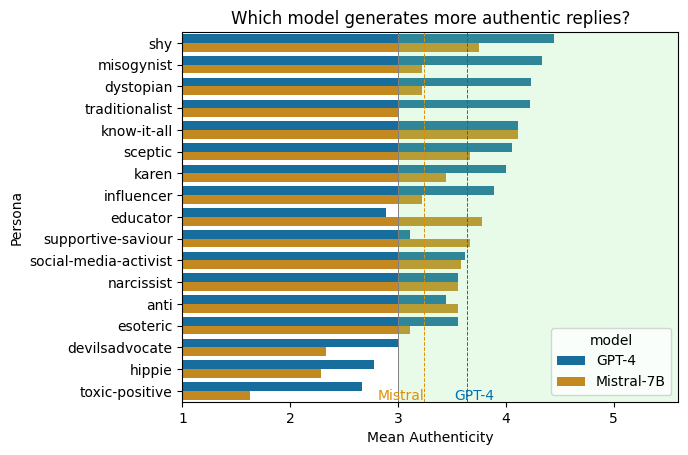

In [104]:
# comparison between mistral and GPT-4 
# compare authenticity between mistral and GPT-4 depending on main_persona
plot_name = '05_authenticity_mistralvGPT4_per_persona_bar_chart'

mistral_samples = dataset[dataset['model'] == 'Mistral-7B']
gpt4_samples = dataset[(dataset['model'] == 'GPT-4') & (dataset['persona'].isin(mistral_samples['persona']))]
mistral_gpt4_samples = pd.concat([mistral_samples, gpt4_samples])
avg = mistral_gpt4_samples.groupby(['model', 'main_persona'])['annotation.authenticity'].mean().reset_index()
avg = avg.sort_values(by='annotation.authenticity', ascending=False)

colors = sns.color_palette('colorblind')
ax = sns.barplot(y='main_persona', x='annotation.authenticity', hue='model', data=avg, palette=colors, errorbar=None)
ax.set_xlim(1, 5.6)
ax.set_title('Which model generates more authentic replies?')
ax.set_ylabel('Persona')
ax.set_xlabel('Mean Authenticity')

ax.axvline(x=3.642, color=colors[0], linestyle='--', linewidth=0.7)
ax.text(3.52, 15.9, 'GPT-4', color=colors[0], ha='left', va='top')
ax.axvline(x=3.243, color=colors[1], linestyle='--', linewidth=0.7)
ax.text(3.24, 15.9, 'Mistral', color=colors[1], ha='right', va='top')
ax.axvline(x=3.0, color='grey', linestyle='-', linewidth=0.7)
ax.axvspan(3, 5.6, facecolor='lightgreen', alpha=0.2)
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

In [21]:
display('Base statistics grouped by languages.') 
(
    dataset
    .groupby('model', observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean', 'std'])]
    .T
)
display('Sample size per persona:')
dataset.groupby('main_persona').size()

'Base statistics grouped by languages.'

'Sample size per persona:'

main_persona
anti                     63
devilsadvocate           63
dystopian                63
educator                 36
esoteric                 36
hippie                   36
hobby-expert             27
influencer               36
karen                    36
know-it-all              45
mediator                 27
misogynist               90
narcissist               36
neutral                  63
sceptic                  63
shy                      54
social-media-activist    45
supportive-saviour       27
toxic-positive           36
traditionalist           54
troll                    48
dtype: int64

                                              persona  annotation.authenticity
87       unemployed_troll_language-youth_radical-left                 4.777778
11                         dystopian_language-default                 4.777778
13  environmental-activist_hobby-expert-dense_lang...                 4.555556
4   carpenter_misogynist-dense_language-old_far-right                 4.555556
80            teenager_troll_language-youth_far-right                 4.555556


                                             persona  annotation.authenticity
25                                        influencer                 2.333333
47  pensioner_toxic-positive_language-old_disengaged                 2.333333
53       phd-student_toxic-positive_language-default                 2.176471
82                                    toxic-positive                 1.777778
18                                      hippie-dense                 1.777778
                                              persona  a

/tmp/ipykernel_28502/788935680.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='annotation.authenticity', y='persona', data=top_bottom_personas, palette=colors)


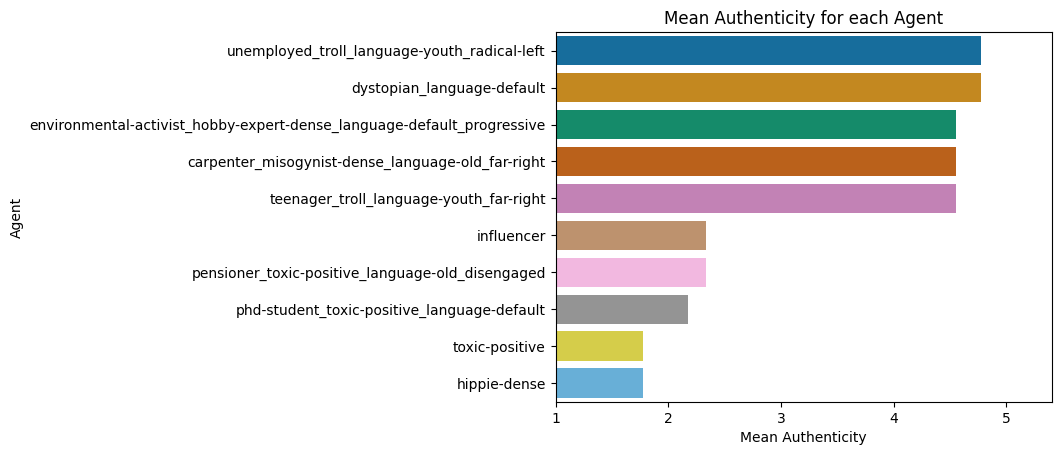

In [130]:
# Calculate the average of annotation.authenticity per main_persona
plot_name = '00_authenticity_per_agent_bar_chart'
avg_authenticity = dataset.groupby('persona')['annotation.authenticity'].mean().reset_index()
avg_authenticity = avg_authenticity.sort_values(by='annotation.authenticity', ascending=False)
print(avg_authenticity.head(5))
print("\n")
print(avg_authenticity.tail(5))
top_bottom_personas = pd.concat([avg_authenticity.head(5), avg_authenticity.tail(5)]) 
top_bottom_personas = top_bottom_personas.sort_values(by='annotation.authenticity', ascending=False)

colors = sns.color_palette('colorblind')
ax = sns.barplot(x='annotation.authenticity', y='persona', data=top_bottom_personas, palette=colors)
ax.set_xlim(1, 5.4)
ax.set_xlabel('Mean Authenticity')
ax.set_ylabel('Agent')
ax.set_title('Mean Authenticity for each Agent')
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

             main_persona  annotation.authenticity
0                    anti                 3.730159
1          devilsadvocate                 3.047619
2               dystopian                 3.709677
3                educator                 3.111111
4                esoteric                 3.444444
5                  hippie                 2.529412
6            hobby-expert                 4.333333
7              influencer                 3.111111
8                   karen                 3.777778
9             know-it-all                 3.800000
10               mediator                 3.259259
11             misogynist                 3.955056
12             narcissist                 3.388889
13                neutral                 3.507937
14                sceptic                 3.698413
15                    shy                 3.622642
16  social-media-activist                 3.476190
17     supportive-saviour                 3.444444
18         toxic-positive      

/tmp/ipykernel_28502/1778801840.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='annotation.authenticity', y='main_persona', data=avg_authenticity, palette=colors)
/tmp/ipykernel_28502/1778801840.py:10: UserWarning: 
The palette list has fewer values (10) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='annotation.authenticity', y='main_persona', data=avg_authenticity, palette=colors)


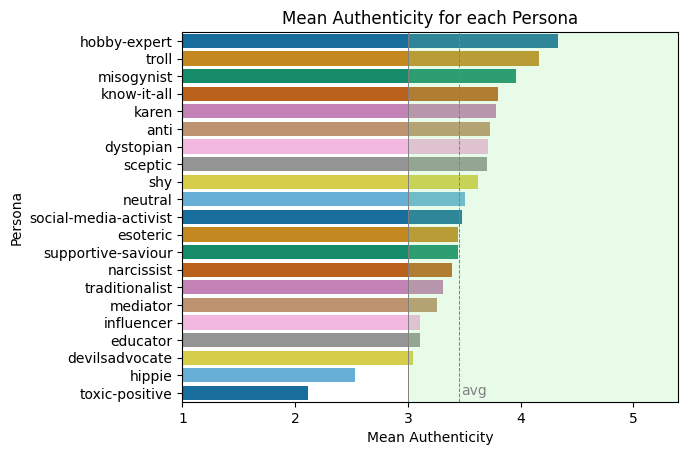

In [84]:
# Calculate the average of annotation.authenticity per main_persona
plot_name = '01_authenticity_per_persona_bar_chart'
avg_authenticity = dataset.groupby('main_persona')['annotation.authenticity'].mean().reset_index()
print(avg_authenticity['annotation.authenticity'].mean())
avg_authenticity = avg_authenticity.sort_values(by='annotation.authenticity', ascending=False)

colors = sns.color_palette('colorblind')
ax = sns.barplot(x='annotation.authenticity', y='main_persona', data=avg_authenticity, palette=colors)
ax.set_xlim(1, 5.4)
ax.set_xlabel('Mean Authenticity')
ax.set_ylabel('Persona')
ax.set_title('Mean Authenticity for each Persona')

ax.axvline(x=3.4544, color='grey', linestyle='--', linewidth=0.7)
ax.text(3.47, 19.5, 'avg', color='grey', ha='left', va='top')
ax.axvline(x=3.0, color='grey', linestyle='-', linewidth=0.7)
ax.axvspan(3, 5.5, facecolor='lightgreen', alpha=0.2)
ax.set_xticks(range(1, 6))

ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

3.7937743190661477


/tmp/ipykernel_28502/1045773286.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='annotation.tone', y='main_persona', data=avg, palette=colors)
/tmp/ipykernel_28502/1045773286.py:8: UserWarning: 
The palette list has fewer values (10) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='annotation.tone', y='main_persona', data=avg, palette=colors)


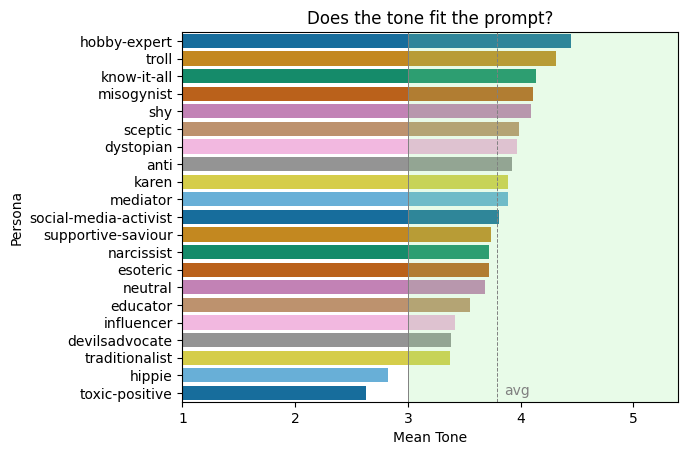

In [17]:
# Calculate the average of annotation.tone per main_persona
plot_name = '04_anno.tone_per_persona_bar_chart'
avg = dataset.groupby('main_persona')['annotation.tone'].mean().reset_index()
avg = avg.sort_values(by='annotation.tone', ascending=False)
avg_tone = dataset['annotation.tone'].mean()
colors = sns.color_palette('colorblind')
ax = sns.barplot(x='annotation.tone', y='main_persona', data=avg, palette=colors)
ax.set_xlim(1, 5.4)
ax.set_xlabel('Mean Tone')
ax.set_ylabel('Persona')
ax.set_title('Does the tone fit the prompt?')

ax.axvline(x=3.794, color='grey', linestyle='--', linewidth=0.7)
ax.text(3.85, 19.5, 'avg', color='grey', ha='left', va='top')
ax.axvline(x=3.0, color='grey', linestyle='-', linewidth=0.7)
ax.axvspan(3, 5.5, facecolor='lightgreen', alpha=0.2)
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

4.140419947506562


/tmp/ipykernel_28502/1643757071.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='annotation.politics', y='main_persona', data=avg, palette=colors)
/tmp/ipykernel_28502/1643757071.py:8: UserWarning: 
The palette list has fewer values (10) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='annotation.politics', y='main_persona', data=avg, palette=colors)


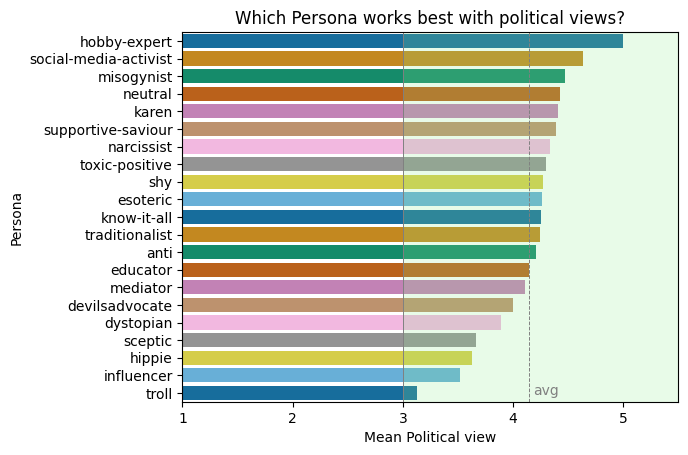

In [18]:
# Calculate the average of annotation.politics per main_persona
plot_name = '02_anno.politics_per_persona_bar_chart'
avg = dataset.groupby('main_persona')['annotation.politics'].mean().reset_index()
avg = avg.sort_values(by='annotation.politics', ascending=False)
avg_politics = dataset['annotation.politics'].mean()

colors = sns.color_palette('colorblind')
ax = sns.barplot(x='annotation.politics', y='main_persona', data=avg, palette=colors)
ax.set_xlim(1, 5.5)
ax.set_xlabel('Mean Political view')
ax.set_ylabel('Persona')
ax.set_title('Which Persona works best with political views?')

ax.axvline(x=4.14, color='grey', linestyle='--', linewidth=0.7)
ax.text(4.18, 19.5, 'avg', color='grey', ha='left', va='top')
ax.axvline(x=3.0, color='grey', linestyle='-', linewidth=0.7)
ax.axvspan(3, 5.5, facecolor='lightgreen', alpha=0.2)
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

3.859086491739553


/tmp/ipykernel_28502/3408301519.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='annotation.persona', y='main_persona', data=avg, palette=colors)
/tmp/ipykernel_28502/3408301519.py:8: UserWarning: 
The palette list has fewer values (10) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='annotation.persona', y='main_persona', data=avg, palette=colors)


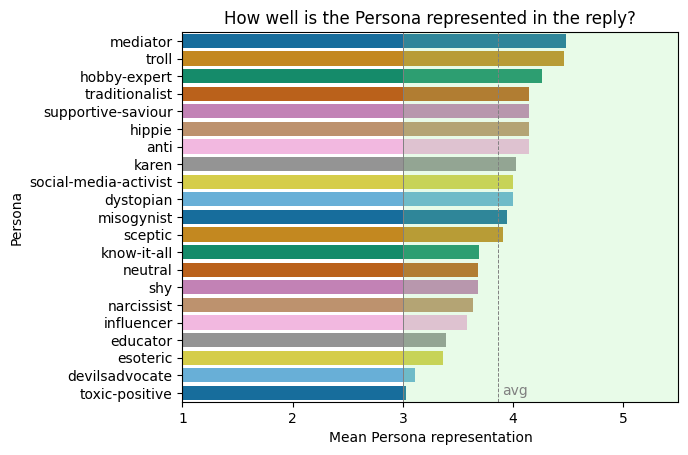

In [19]:

# Calculate the average of annotation.persona per main_persona
plot_name = '03_anno.persona_per_persona_bar_chart'
avg = dataset.groupby('main_persona')['annotation.persona'].mean().reset_index()
avg = avg.sort_values(by='annotation.persona', ascending=False)
avg_pers = dataset['annotation.persona'].mean()

colors = sns.color_palette('colorblind')
ax = sns.barplot(x='annotation.persona', y='main_persona', data=avg, palette=colors)
ax.set_xlim(1, 5.5)
ax.set_xlabel('Mean Persona representation')
ax.set_ylabel('Persona')
ax.set_title('How well is the Persona represented in the reply?')

ax.axvline(x=3.859, color='grey', linestyle='--', linewidth=0.7)
ax.text(3.9, 19.5, 'avg', color='grey', ha='left', va='top')
ax.axvline(x=3.0, color='grey', linestyle='-', linewidth=0.7)
ax.axvspan(3, 5.5, facecolor='lightgreen', alpha=0.2)
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

/tmp/ipykernel_28502/3949098336.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(y='language_prompt', x='annotation.authenticity', hue='real_tweet', data=dataset, palette=colors, errorbar=None)


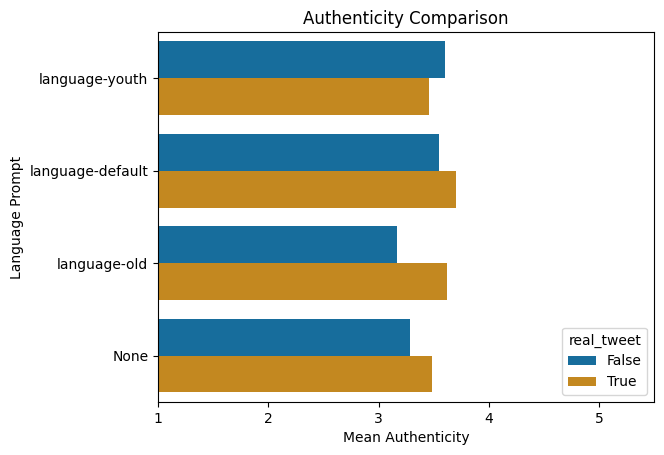

In [22]:
# compare authenticity between real and generated tweets depending on language prompt
plot_name = 'authenticity_realvfake_per_language_bar_chart'

colors = sns.color_palette('colorblind')
ax = sns.barplot(y='language_prompt', x='annotation.authenticity', hue='real_tweet', data=dataset, palette=colors, errorbar=None)
ax.set_xlim(1, 5.5)
ax.set_title('Authenticity Comparison')
ax.set_ylabel('Language Prompt')
ax.set_xlabel('Mean Authenticity')
sns.move_legend(ax, "lower right")
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

/tmp/ipykernel_28502/3623715559.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(y='language_prompt', x='annotation.tone', hue='real_tweet', data=dataset, palette=colors, errorbar=None)


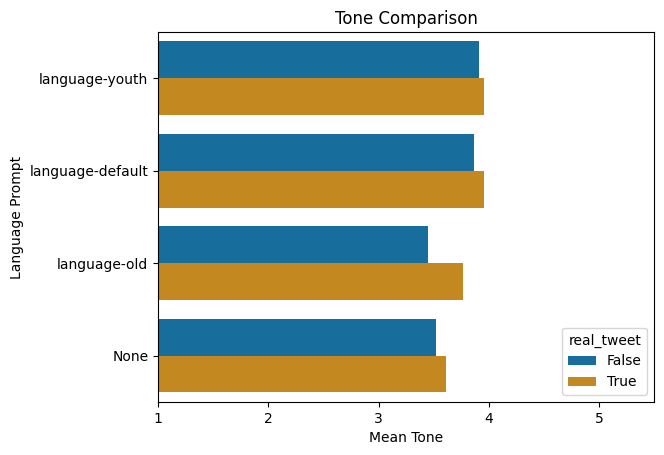

In [21]:
# compare tone between real and fake tweets depending on language prompt
plot_name = 'tone_realvfake_per_language_bar_chart'

colors = sns.color_palette('colorblind')
ax = sns.barplot(y='language_prompt', x='annotation.tone', hue='real_tweet', data=dataset, palette=colors, errorbar=None)
ax.set_xlim(1, 5.5)  # Set x-axis limit to 5
ax.set_title('Tone Comparison')
ax.set_xlabel('Mean Tone')
ax.set_ylabel('Language Prompt')
sns.move_legend(ax, "lower right")
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

with_language_prompt
True     750
False    288
Name: count, dtype: int64
with_language_prompt
False    3.219955
True     3.528074
Name: annotation.authenticity, dtype: float64
with_language_prompt
False    3.392361
True     3.573549
Name: annotation.authenticity, dtype: float64


/tmp/ipykernel_28502/486560732.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(y='main_persona', x='annotation.authenticity', hue='with_language_prompt', data=dataset, palette=colors, errorbar=None)


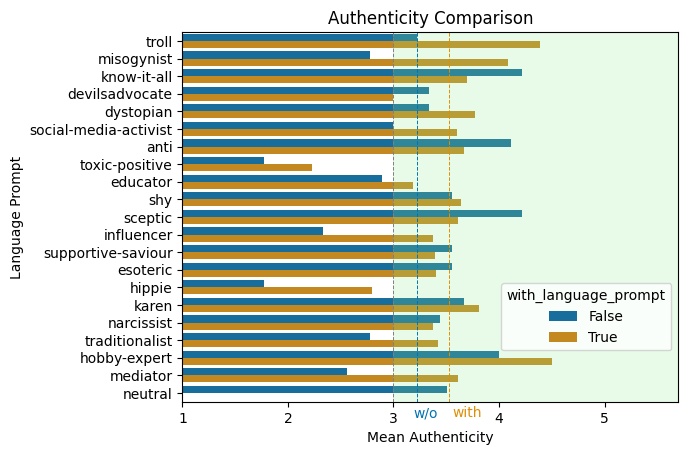

In [132]:
# compare tone between language prompt and no language prompt depending on language prompt
plot_name = '06_authenticity_per_persona_language_yesvno_bar_chart'

dataset['with_language_prompt'] = dataset['language_prompt'] != "None"
print(dataset['with_language_prompt'].value_counts())
avg_auth_binary = dataset.groupby(['with_language_prompt', 'main_persona'])['annotation.authenticity'].mean()
avg = avg_auth_binary.groupby('with_language_prompt').mean()
avg_auth_binary = dataset.groupby(['with_language_prompt'])['annotation.authenticity'].mean()
#avg_auth_binary = avg_auth_binary.sort_values(by='annotation.authenticity', ascending=False)

colors = sns.color_palette('colorblind')
ax = sns.barplot(y='main_persona', x='annotation.authenticity', hue='with_language_prompt', data=dataset, palette=colors, errorbar=None)
ax.set_xlim(1, 5.7)
ax.set_title('Authenticity Comparison')
ax.set_xlabel('Mean Authenticity')
ax.set_ylabel('Language Prompt')

ax.axvline(x=3.22, color=colors[0], linestyle='--', linewidth=0.7)
ax.text(3.19, 20.75, 'w/o', color=colors[0], ha='left', va='top')
ax.axvline(x=3.528, color=colors[1], linestyle='--', linewidth=0.7)
ax.text(3.56, 20.75, 'with', color=colors[1], ha='left', va='top')
ax.axvline(x=3.0, color='grey', linestyle='--', linewidth=0.7)
ax.axvspan(3, 5.7, facecolor='lightgreen', alpha=0.2)

sns.move_legend(ax, "lower right", bbox_to_anchor=(1.0, 0.12))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

with_language_prompt  main_persona         
False                 anti                     4.222222
                      devilsadvocate           3.666667
                      dystopian                3.333333
                      educator                 2.888889
                      esoteric                 3.777778
                      hippie                   2.333333
                      hobby-expert             4.111111
                      influencer               2.444444
                      karen                    3.777778
                      know-it-all              4.333333
                      mediator                 2.888889
                      misogynist               3.333333
                      narcissist               3.666667
                      neutral                  3.682540
                      sceptic                  4.000000
                      shy                      3.333333
                      social-media-activist    3.444444
    

/tmp/ipykernel_28502/1754072257.py:18: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(y='main_persona', x='annotation.tone', hue='with_language_prompt', data=dataset, palette=colors, order=avg_tone['main_persona'], errorbar=None)


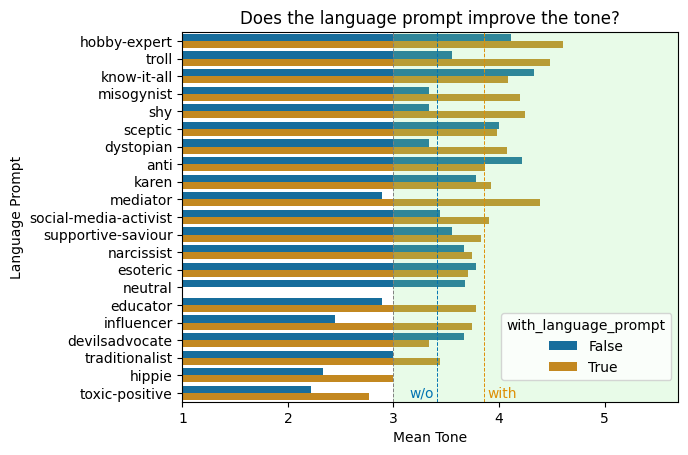

In [103]:
# compare tone between language prompt and no language prompt depending on language prompt
plot_name = '07_tone_per_persona_language_yesvno_bar_chart'

dataset['with_language_prompt'] = dataset['language_prompt'] != "None"
avg = dataset.groupby(['with_language_prompt','main_persona'])['annotation.tone'].mean()
avg = avg.groupby('with_language_prompt').mean()
avg_tone = dataset.groupby('main_persona')['annotation.tone'].mean().reset_index()
#avg = avg_tone.groupby('with_language_prompt').mean()
avg_tone = avg_tone.sort_values(by='annotation.tone', ascending=False)

colors = sns.color_palette('colorblind')
ax = sns.barplot(y='main_persona', x='annotation.tone', hue='with_language_prompt', data=dataset, palette=colors, order=avg_tone['main_persona'], errorbar=None)
ax.set_xlim(1, 5.7)
ax.set_title('Does the language prompt improve the tone?')
ax.set_xlabel('Mean Tone')
ax.set_ylabel('Language Prompt')
ax.axvline(x=3.408, color=colors[0], linestyle='--', linewidth=0.7)
ax.text(3.38, 19.65, 'w/o', color=colors[0], ha='right', va='top')
ax.axvline(x=3.856, color=colors[1], linestyle='--', linewidth=0.7)
ax.text(3.89, 19.65, 'with', color=colors[1], ha='left', va='top')
ax.axvline(x=3.0, color='grey', linestyle='--', linewidth=0.7)
ax.axvspan(3, 5.9, facecolor='lightgreen', alpha=0.2)
sns.move_legend(ax, "lower right", bbox_to_anchor=(1.0, 0.04))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

/tmp/ipykernel_28502/2096905281.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(y='political_view', x='annotation.politics', hue='real_tweet', data=dataset[dataset['political_view'] != 'None'], palette=colors, errorbar=None)


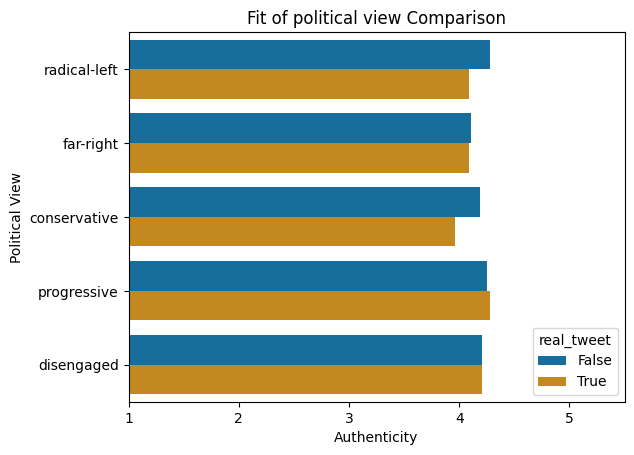

In [24]:
# compare fit of political opinion between real and generated tweets depending on political view
plot_name = 'political_view_fit_realvfake_bar_chart'

colors = sns.color_palette('colorblind')
ax = sns.barplot(y='political_view', x='annotation.politics', hue='real_tweet', data=dataset[dataset['political_view'] != 'None'], palette=colors, errorbar=None)
ax.set_xlim(1, 5.5)
ax.set_title('Fit of political view Comparison')
ax.set_ylabel('Political View')
ax.set_xlabel('Authenticity')
sns.move_legend(ax, "lower right")
ax.set_xticks(range(1, 6))
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")

/tmp/ipykernel_28502/1554847722.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(x='annotation.authenticity', y='political_view', hue='real_tweet', data=dataset[dataset['political_view'] != 'None'], palette=colors, errorbar=None)


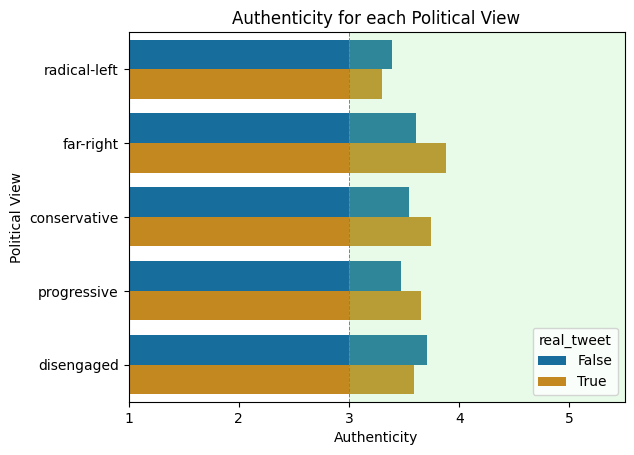

In [79]:
# compare authenticity of political opinion between real and generated tweets depending on political view
plot_name = '08_authenticity_realvfake_per_political_view_bar_chart'

colors = sns.color_palette('colorblind')
ax = sns.barplot(x='annotation.authenticity', y='political_view', hue='real_tweet', data=dataset[dataset['political_view'] != 'None'], palette=colors, errorbar=None)
ax.set_xlim(1, 5.5)
ax.set_xticks(range(1, 6))
ax.set_title('Authenticity for each Political View')
ax.set_ylabel('Political View')
ax.set_xlabel('Authenticity')
ax.axvline(x=3.0, color='grey', linestyle='--', linewidth=0.7)
ax.axvspan(3, 5.9, facecolor='lightgreen', alpha=0.2)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.png', format="png", bbox_inches="tight")